In [17]:
import fastai
import os

print(fastai.__version__)
print(os.getenv("PYTORCH_ENABLE_MPS_FALLBACK"))

# https://github.com/microsoft/vscode-jupyter/issues/13163
from IPython.display import clear_output, DisplayHandle


def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)


DisplayHandle.update = update_patch

2.7.12
1


In [18]:
from fastai.vision.all import *
from pathlib import Path
import pandas as pd

In [19]:
df = pd.read_csv("labels.csv")
df.tail(5)

,filename,label
795,British_Shorthair_21.jpg,cat
796,Siamese_149.jpg,cat
797,Siamese_89.jpg,cat
798,Birman_156.jpg,cat
799,Abyssinian_228.jpg,cat


In [20]:
df = df.sample(frac=0.1)

In [21]:
def get_x(x):
    return Path("data") / x["filename"]


def get_y(x):
    return x["label"]

In [22]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=get_x,
    get_y=get_y,
    # splitter=TrainTestSplitter(test_size=0.2, random_state=42, stratify=df["label"]),
    splitter=TrainTestSplitter(test_size=0.2, random_state=42, stratify=df["label"]),
    item_tfms=[RandomResizedCrop(224 + 40, min_scale=0.35)],
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)],
)


Setting-up type transforms pipelines
760                            Persian_90.jpg    cat
537                         Abyssinian_14.jpg    cat
241  img-aae222fd-835f-4ce2-97b9-6038d9433f6a  nocat
303  img-d15c6d9c-5e2d-4dc8-b6c5-1e130edaf368  nocat
35   img-c7926729-cb78-4421-ac23-3423f12b25d0  nocat
..                                        ...    ...
382  img-5d65b341-6415-42c1-80ea-a29c9f133496  nocat
78   img-633295b1-bc94-457e-808e-027e54b174be  nocat
645                            Sphynx_172.jpg    cat
705                            Sphynx_103.jpg    cat
377  img-0487e85a-a12e-4092-b6fb-53ad91ed86c2  nocat

[80 rows x 2 columns]
Found 80 items
2 datasets of sizes 64,16
Setting up Pipeline: get_x -> PILBase.create
Setting up Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: get_x -> PILBase.create
    starting from
      filename    img-17c3c9e2-eb96-4265-8351-4633c04cf692
label                                         

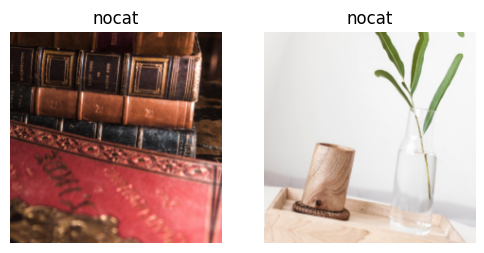

In [23]:
dblock.summary(df, show_batch=True, bs=2)

In [24]:
dls = dblock.dataloaders(df, bs=2)

In [25]:
learn = vision_learner(dls, resnet18, metrics=accuracy)

/Users/r/projects/ws-live/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/r/projects/ws-live/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [26]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.817962,0.054732,1.000000,00:03
1,0.857726,0.092537,1.000000,00:03


In [27]:
learn.export("test.pkl")